<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Bab_2_3_2_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2.3.2.1 Persiapan data dan impor ke Python

In [2]:
# 2.3.2.2 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

In [3]:
# 2.3.2.3 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Status_Rekening_Bank,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,debt_burden_ratio,SLIK_Kolektibilitas,SLIK_Outstanding,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,6.0,peralatan_rumahtangga,1169000,1_pegawai_tetap,2_Tabungan_<=_100_ribu,5. rahasia,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,1_0_ke_25%,1.0,0.000000e+00,305,192,Android,16,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,48.0,peralatan_rumahtangga,5951000,1_pegawai_tetap,3_Tabungan_<=_2_juta,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,2_25_ke_50%,3.0,3.718614e+06,252,86,IOS,26,3_Lebih_3_tahun,Games,Telco_E,1_Kurang_1_bulan,Public_Domain
2,ABC0003,0_Bayar,12.0,liburan,2096000,3_wiraswasta,1_Tidak_ada_Rekening,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,2_25_ke_50%,1.0,0.000000e+00,858,97,Android,108,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
3,ABC0004,0_Bayar,42.0,elektronik,7882000,1_pegawai_tetap,2_Tabungan_<=_100_ribu,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_1,45.0,4_>10_tahun,2_25_ke_50%,3.0,2.216175e+06,108,159,Android,42,3_Lebih_3_tahun,Online_Lending,Telco_E,2_Kurang_1_tahun,Professional_Domain
4,ABC0005,1_Gagal,24.0,mobil_baru,4870000,1_pegawai_tetap,2_Tabungan_<=_100_ribu,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,3_50_ke_75%,2.0,5.102303e+05,487,63,Android,29,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
5,ABC0006,0_Bayar,36.0,liburan,5,3_wiraswasta,1_Tidak_ada_Rekening,5. rahasia,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_2,35.0,4_>10_tahun,2_25_ke_50%,3.0,2.403041e+06,595,200,Android,98,3_Lebih_3_tahun,Social_Media,Telco_E,2_Kurang_1_tahun,Public_Domain
6,ABC0007,0_Bayar,24.0,elektronik,5,1_pegawai_tetap,1_Tidak_ada_Rekening,3. 5 - 10 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,3_50_ke_75%,3.0,6.676772e+05,334,172,Android,109,3_Lebih_3_tahun,Productivity,Telco_C,5_Lebih_5_tahun,Public_Domain
7,ABC0008,0_Bayar,36.0,mobil_bekas,5,4_tidak_bekerja,3_Tabungan_<=_2_juta,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_1,35.0,2_1-5_tahun,2_25_ke_50%,3.0,1.921838e+06,107,186,Android,104,3_Lebih_3_tahun,Productivity,Telco_E,5_Lebih_5_tahun,Public_Domain
8,ABC0009,0_Bayar,12.0,peralatan_rumahtangga,5,3_wiraswasta,NaN,4. > 10 juta,4_4-7_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,61.0,4_>10_tahun,2_25_ke_50%,3.0,2.639372e+06,45,235,IOS,51,3_Lebih_3_tahun,Social_Media,Telco_B,3_1_ke_2_tahun,Public_Domain
9,ABC0010,1_Gagal,30.0,mobil_baru,5,4_tidak_bekerja,NaN,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,1_0_ke_25%,1.0,0.000000e+00,254,285,Android,51,3_Lebih_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain


In [4]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              999 non-null    object 
 1   gagal_bayar                     991 non-null    object 
 2   Lama_Cicilan                    981 non-null    float64
 3   Tujuan_Pinjaman                 995 non-null    object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       987 non-null    object 
 6   Status_Rekening_Bank            989 non-null    object 
 7   Pendapatan_perbulan             989 non-null    object 
 8   Lama_Bekerja                    972 non-null    object 
 9   Status                          995 non-null    object 
 10  Kepemilikan_Rumah               996 non-null    object 
 11  Alamat_Rumah                    1000 non-null   object 
 12  Alamat_Kantor                   100

In [5]:
# 2.3.2.4 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Status_Rekening_Bank'] = df.Status_Rekening_Bank.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['debt_burden_ratio'] = df.debt_burden_ratio.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Outstanding'] = df.SLIK_Outstanding.astype('float64')

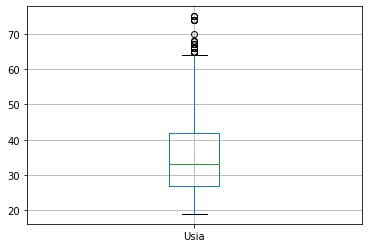

In [6]:
# 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

df.boxplot(column=['Usia'])

In [7]:
# 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai

# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
# 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)

# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [9]:
# 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)

# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

In [10]:
# 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [11]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [12]:
# 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    626
1_Gagal    248
Name: gagal_bayar, dtype: int64
0_Bayar    71.624714
1_Gagal    28.375286
Name: gagal_bayar, dtype: float64


In [13]:
# 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas

# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

3.0    468
1.0    265
2.0     80
5.0     47
4.0     14
Name: SLIK_Kolektibilitas, dtype: int64
3.0    53.546911
1.0    30.320366
2.0     9.153318
5.0     5.377574
4.0     1.601831
Name: SLIK_Kolektibilitas, dtype: float64


In [14]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
1.0                      225       40
2.0                       55       25
3.0                      320      148
4.0                        6        8
5.0                       20       27
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
1.0                  84.905660  15.094340
2.0                  68.750000  31.250000
3.0                  68.376068  31.623932
4.0                  42.857143  57.142857
5.0                  42.553191  57.446809


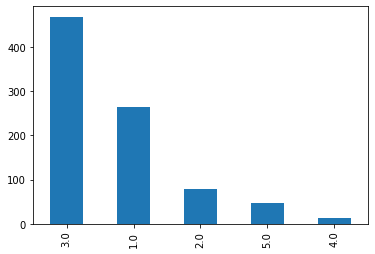

In [15]:
# 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

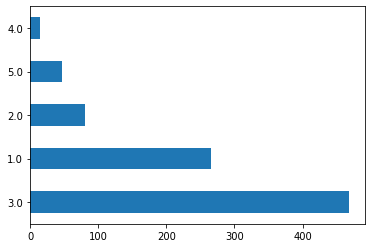

In [16]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

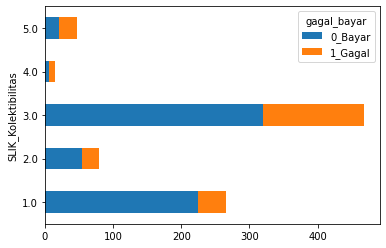

In [17]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

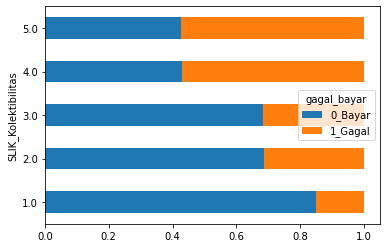

In [18]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

In [19]:
# 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    874.000000
mean      35.770023
std       11.457115
min       19.000000
25%       27.000000
50%       33.500000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,626.0,36.400958,11.398271,19.0,27.0,35.0,43.00,75.0
1_Gagal,248.0,34.177419,11.473644,19.0,25.0,31.0,40.25,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

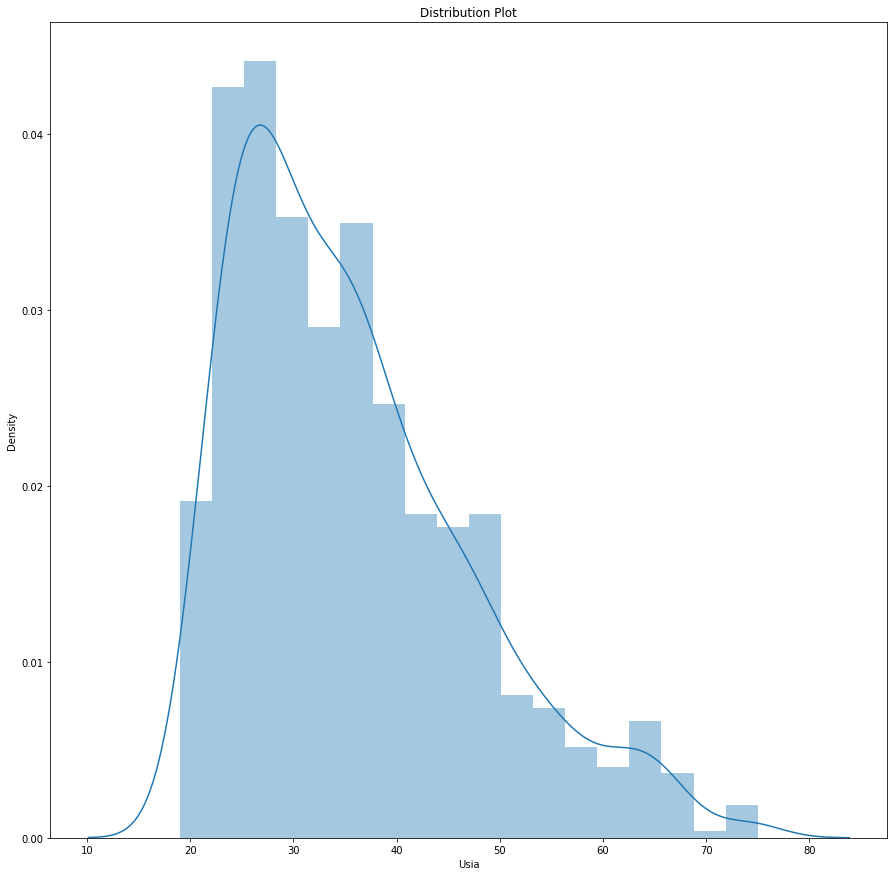

In [20]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


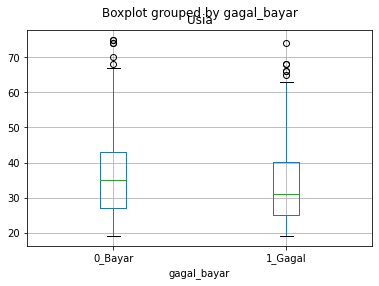

In [21]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

In [22]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Menghitung korelasi antara variabel API_CreditScore_Vendor_Adengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.08754264342140397


In [24]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.59506632950903, pvalue=0.009616154033831778)

In [25]:
# 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Outstanding,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.606132,-0.043291,0.085806,-0.047597,-0.043466,-0.018489,0.201927
Jumlah_Pinjaman,0.606132,1.000000,0.036817,0.004555,0.021837,-0.010770,-0.010018,0.144900
Usia,-0.043291,0.036817,1.000000,-0.185181,0.019138,0.016607,0.042908,-0.087543
SLIK_Outstanding,0.085806,0.004555,-0.185181,1.000000,-0.138387,-0.094038,-0.087114,0.502777
API_CreditScore_Vendor_A,-0.047597,0.021837,0.019138,-0.138387,1.000000,-0.006830,0.017581,-0.035224
API_CreditScore_Vendor_B,-0.043466,-0.010770,0.016607,-0.094038,-0.006830,1.000000,-0.004025,-0.156592
Device_Apps_Installed,-0.018489,-0.010018,0.042908,-0.087114,0.017581,-0.004025,1.000000,-0.149216
default,0.201927,0.144900,-0.087543,0.502777,-0.035224,-0.156592,-0.149216,1.000000


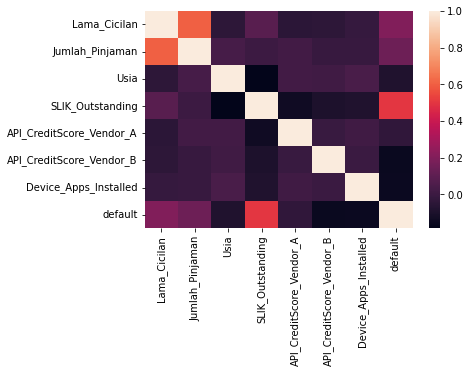

In [26]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              874 non-null    category
 1   gagal_bayar                     874 non-null    category
 2   Lama_Cicilan                    874 non-null    float64 
 3   Tujuan_Pinjaman                 874 non-null    category
 4   Jumlah_Pinjaman                 874 non-null    float64 
 5   Pekerjaan                       874 non-null    category
 6   Status_Rekening_Bank            874 non-null    category
 7   Pendapatan_perbulan             874 non-null    category
 8   Lama_Bekerja                    874 non-null    category
 9   Status                          874 non-null    category
 10  Kepemilikan_Rumah               874 non-null    category
 11  Alamat_Rumah                    874 non-null    category
 12  Alamat_Kantor         

In [28]:
# 2.3.2.5.6.2 Memahami korelasi antar variabel independent 

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_TV  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_TV                                    0.000000  ...                     5.001180e-02
Tujuan_Pinjaman_buka_bisnis                           0.380235  ...                     7.311951e-03
Tujuan_Pinjaman_elektronik                            0.210048  ...                     1.769377e-01
Tujuan_Pinjaman_liburan                               0.489051  ...                     3.118684e-01
Tujuan_Pinjaman_makanan                               0.656594  ...                     7.307766e-01
...                                                        ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun             0.225811  ...                     3.202254e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun             0.190110  ...                     1.549275e-01
Mobile_Number_Active_Since_5_Lebih_5_tahun            0.607531  ...                     4.6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Menghindari multikolinearitas antara Lama_Cicilan dan Jumlah_Pinjaman
df_clean.drop(columns=['Jumlah_Pinjaman'], inplace=True)

In [30]:
# 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default,0,1,woe,iv
SLIK_Kolektibilitas,,,,
1.0,0.359425,0.161290,-0.801299,0.295621
2.0,0.087859,0.100806,0.137464,0.295621
3.0,0.511182,0.596774,0.154813,0.295621
4.0,0.009585,0.032258,1.213604,0.295621
5.0,0.031949,0.108871,1.226026,0.295621


In [31]:
conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 1 ),
             ( df_clean['SLIK_Kolektibilitas'] == 2 ) | ( df_clean['SLIK_Kolektibilitas'] == 3 ),
             ( df_clean['SLIK_Kolektibilitas'] == 4 ) | ( df_clean['SLIK_Kolektibilitas'] == 5 )
             ]

choices = [
          '1',
          '2&3',
          '4&5'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default,0,1,woe,iv
SLIK_Kolektibilitas_Bin,,,,
1,0.359425,0.161290,-0.801299,0.295594
2&3,0.599042,0.697581,0.152287,0.295594
4&5,0.041534,0.141129,1.223173,0.295594


In [32]:
conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 28 ),
             ( df_clean['Usia'] >= 29 ) & ( df_clean['Usia'] <= 31 ),
             ( df_clean['Usia'] >= 32 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 37 ),
             ( df_clean['Usia'] >= 38 ) & ( df_clean['Usia'] <= 42 ),
             ( df_clean['Usia'] >= 43 ) & ( df_clean['Usia'] <= 48 ),
             ( df_clean['Usia'] >= 49 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-28',
          '4.29-31',
          '5.32-34',
          '6.35-37',
          '7.38-42',
          '8.43-48',
          '9.>=49'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default    0   1
Usia_Bin        
1.<=23    57  38
2.24-26   74  41
3.27-28   58  20
4.29-31   67  29
5.32-34   53  26
6.35-37   79  16
7.38-42   77  26
8.43-48   65  23
9.>=49    96  29


default,0,1,woe,iv
Usia_Bin,,,,
1.<=23,0.091054,0.153226,0.520457,0.11043
2.24-26,0.118211,0.165323,0.335429,0.11043
3.27-28,0.092652,0.080645,-0.138789,0.11043
4.29-31,0.107029,0.116935,0.088525,0.11043
5.32-34,0.084665,0.104839,0.213726,0.11043
6.35-37,0.126198,0.064516,-0.670938,0.11043
7.38-42,0.123003,0.104839,-0.159787,0.11043
8.43-48,0.103834,0.092742,-0.112971,0.11043
9.>=49,0.153355,0.116935,-0.271131,0.11043


In [33]:
conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-34',
          '4.>=35'
          ]
df_clean['Usia_Bin2'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin2'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default    0   1
Usia_Bin        
1.<=23    57  38
2.24-26   74  41
3.27-28   58  20
4.29-31   67  29
5.32-34   53  26
6.35-37   79  16
7.38-42   77  26
8.43-48   65  23
9.>=49    96  29


default,0,1,woe,iv
Usia_Bin2,,,,
1.<=23,0.091054,0.153226,0.520457,0.086168
2.24-26,0.118211,0.165323,0.335429,0.086168
3.27-34,0.284345,0.302419,0.061626,0.086168
4.>=35,0.506390,0.379032,-0.289685,0.086168


In [34]:
df_score_manual = df_clean[['SLIK_Kolektibilitas_Bin','default']]

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 1 ),
             ( df_clean['SLIK_Kolektibilitas'] == 2 ) | ( df_clean['SLIK_Kolektibilitas'] == 3 ),
             ( df_clean['SLIK_Kolektibilitas'] == 4 ) | ( df_clean['SLIK_Kolektibilitas'] == 5 )
             ]
choices = [
          -0.801299,
          0.152287,
          1.223173
          ]

df_score_manual['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)
df_score_manual = df_score_manual[['SLIK_Kolektibilitas_WOE','default']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
y_train = df_score_manual.loc[:,'default']
X_train = df_score_manual.loc[:,df_score_manual.columns != 'default']

print(X_train)
print(y_train)

     SLIK_Kolektibilitas_WOE
0                  -0.801299
1                   0.152287
2                  -0.801299
3                   0.152287
4                   0.152287
..                       ...
995                 0.152287
996                 0.152287
997                 0.152287
998                 0.152287
999                -0.801299

[874 rows x 1 columns]
0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 874, dtype: int64


In [36]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[[0.97898839]]


In [37]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

     |████████████████████████████████| 55 kB 2.0 MB/s 


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              874 non-null    category
 1   gagal_bayar                     874 non-null    category
 2   Lama_Cicilan                    874 non-null    float64 
 3   Tujuan_Pinjaman                 874 non-null    category
 4   Pekerjaan                       874 non-null    category
 5   Status_Rekening_Bank            874 non-null    category
 6   Pendapatan_perbulan             874 non-null    category
 7   Lama_Bekerja                    874 non-null    category
 8   Status                          874 non-null    category
 9   Kepemilikan_Rumah               874 non-null    category
 10  Alamat_Rumah                    874 non-null    category
 11  Alamat_Kantor                   874 non-null    category
 12  Usia                  

[INFO] creating woe binning ...
Binning on 874 rows and 24 columns in 00:00:11


/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To co

{'API_CreditScore_Vendor_A': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_B': <Figure size 432x288 with 2 Axes>,
 'Alamat_Kantor': <Figure size 432x288 with 2 Axes>,
 'Alamat_Rumah': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Segmentation': <Figure size 432x288 with 2 Axes>,
 'Device_Type': <Figure size 432x288 with 2 Axes>,
 'Email_Domain_Type': <Figure size 432x288 with 2 Axes>,
 'Kepemilikan_Rumah': <Figure size 432x288 with 2 Axes>,
 'Lama_Bekerja': <Figure size 432x288 with 2 Axes>,
 'Lama_Cicilan': <Figure size 432x288 with 2 Axes>,
 'Lama_tinggal_ditempat_sekarang': <Figure size 432x288 with 2 Axes>,
 'Mobile_Number_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider': <Figure size 432x288 with 2 Axes>,
 'Pekerjaan': <Figure size 432x288 with 2 Axes>,
 'Pendapatan_perbulan': <Figure size 432x288 with 2 Axes>,
 'SLIK_Outstand

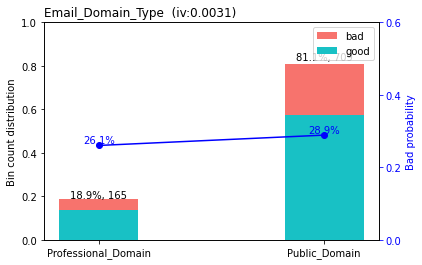

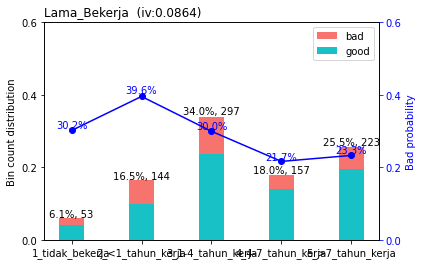

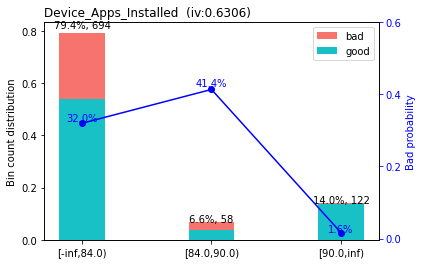

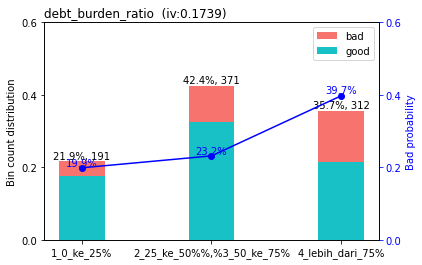

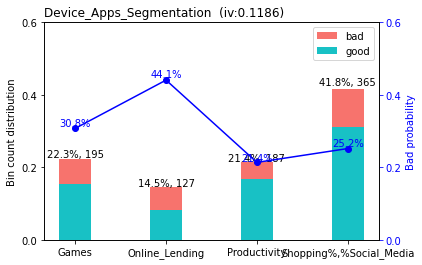

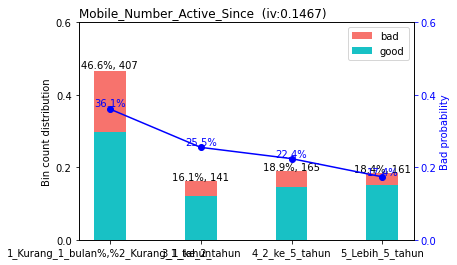

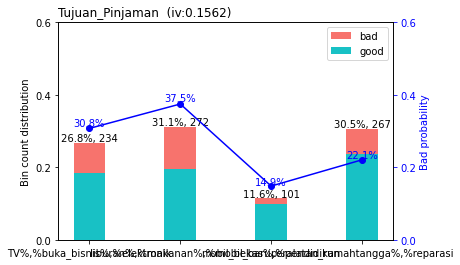

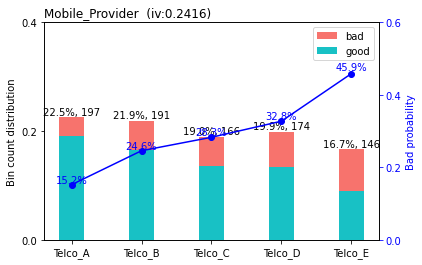

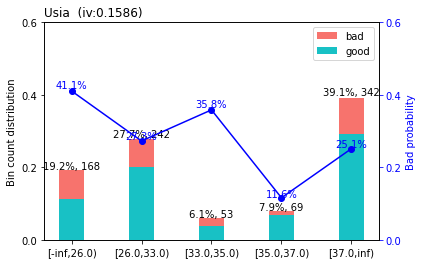

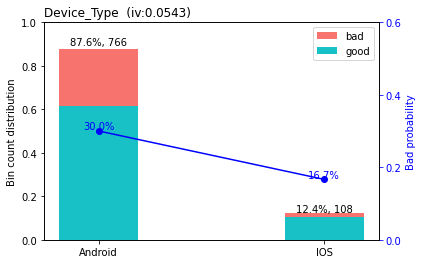

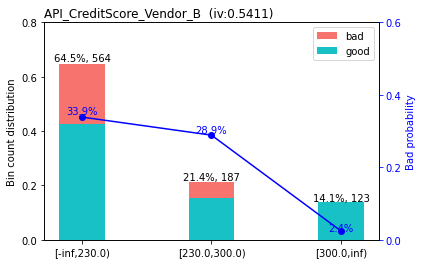

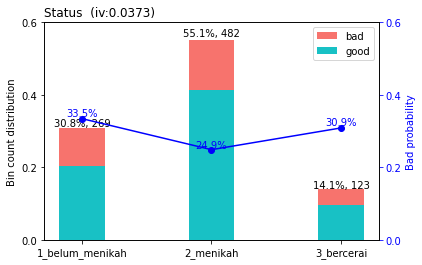

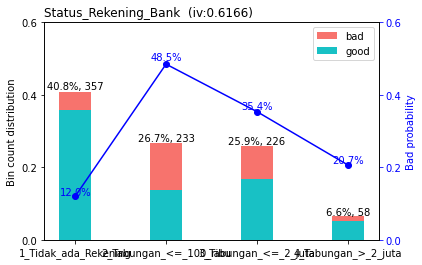

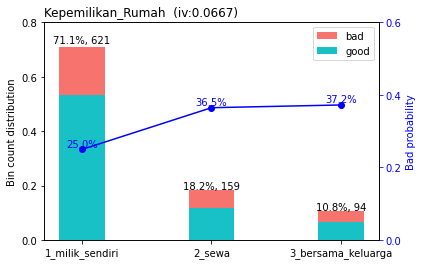

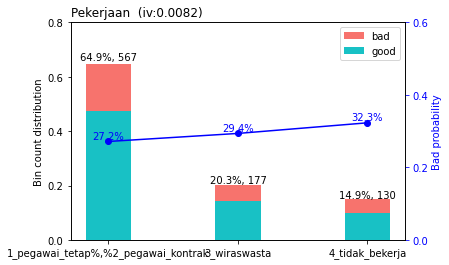

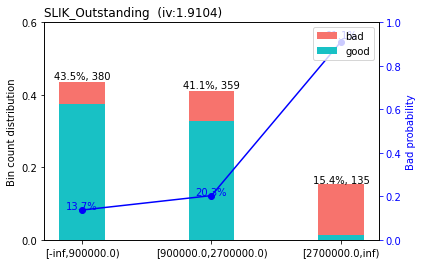

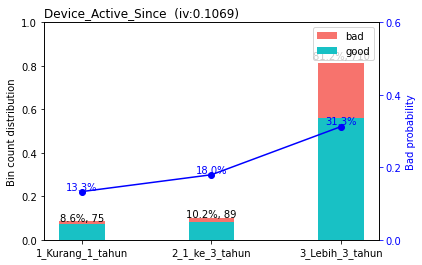

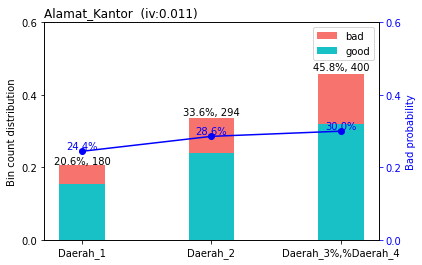

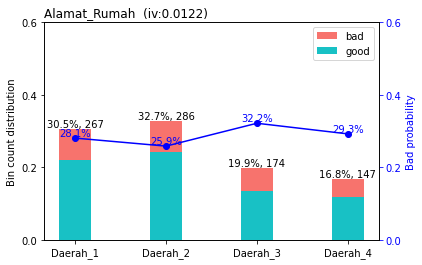

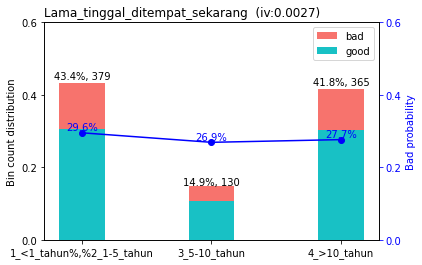

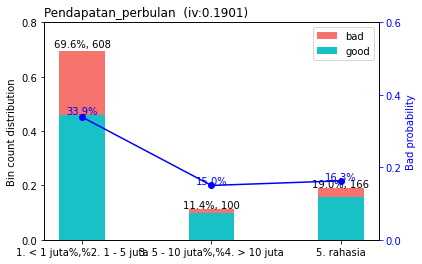

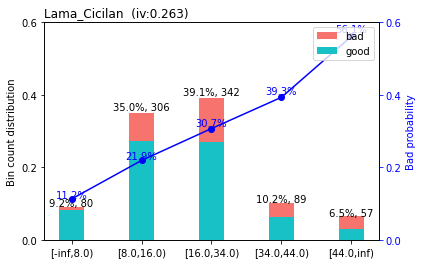

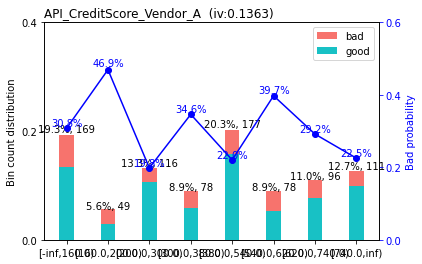

In [39]:
#df_score_test = df_clean[['SLIK_Kolektibilitas_Bin','default']]
df_score_test = df_clean[['default','Pekerjaan','Tujuan_Pinjaman','Lama_Cicilan','Status_Rekening_Bank','Pendapatan_perbulan'
,'Lama_Bekerja','Status','Kepemilikan_Rumah','Alamat_Rumah','Alamat_Kantor','Usia','Lama_tinggal_ditempat_sekarang'
,'debt_burden_ratio','SLIK_Outstanding','API_CreditScore_Vendor_A','API_CreditScore_Vendor_B','Device_Type'
,'Device_Apps_Installed','Device_Active_Since','Device_Apps_Segmentation','Mobile_Provider','Mobile_Number_Active_Since'
,'Email_Domain_Type']]
# isu SLIK_Kolektibilitas

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_score_test, y = 'default')
scpy.woebin_plot(bins)

In [40]:
# converting train and test into woe values
train_woe = scpy.woebin_ply(df_score_test, bins)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


     Email_Domain_Type_woe  ...  API_CreditScore_Vendor_A_woe
0                 0.026355  ...                      0.289933
1                 0.026355  ...                     -0.471184
2                 0.026355  ...                     -0.309550
3                -0.116899  ...                      0.114991
4                 0.026355  ...                     -0.337770
..                     ...  ...                           ...
995               0.026355  ...                      0.289933
996               0.026355  ...                      0.038618
997               0.026355  ...                      0.289933
998               0.026355  ...                      0.289933
999              -0.116899  ...                     -0.471184

[874 rows x 23 columns]
0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 874, dtype: int64


In [41]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[[ 1.2311511   0.56746258  0.97852254  1.14722791  1.0054648   1.08799493
   0.24460726  0.31840008  0.5314387   0.50386909  0.22660624  0.88348824
   0.55760677 -0.39769032  0.66742078  0.65585639  0.66023363  1.09685902
   0.82516715  0.30363038  0.98925585  0.71114551  0.61039278]]


In [42]:
# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train.astype(float))
result = model.fit()

result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.302398
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  874
Model:                          Logit   Df Residuals:                      851
Method:                           MLE   Df Model:                           22
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                  0.4930
Time:                        09:23:59   Log-Likelihood:                -264.30
converged:                       True   LL-Null:                       -521.31
Covariance Type:            nonrobust   LLR p-value:                 8.664e-95
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Email_Domain_Type_woe                  8.0147      2.335      3.432      0.001       3.437      12.592
Lama_Bekerja_woe                       0.7199      0.400      1.798      0.072      -0.065       1.505
Device_Apps_Installed_woe              0.8628      0.174      4.954      0.000       0.521       1.204
debt_burden_ratio_woe                  1.2257      0.282      4.339      0.000       0.672       1.779
Device_Apps_Segmentation_woe           1.6183      0.416      3.890      0.000       0.803       2.434
Tujuan_Pinjaman_woe                    1.2090      0.293      4.124      0.000       0.634       1.784
Mobile_Provider_woe                    0.3233      0.389      0.830      0.406      -0.440       1.087
Device_Type_woe                        0.5358      0.457      1.173      0.241      -0.360       1.431
Status_woe                             0.6051      0.624      0.970      0.332      -0.618       1.828
Pekerjaan_woe                          1.2128      1.243      0.976      0.329      -1.224       3.650
Device_Active_Since_woe                0.3216      0.406      0.793      0.428      -0.473       1.117
Alamat_Kantor_woe                      1.6685      1.095      1.524      0.128      -0.478       3.815
Alamat_Rumah_woe                       0.7738      1.034      0.748      0.454      -1.252       2.800
Lama_tinggal_ditempat_sekarang_woe    -2.2065      2.243     -0.984      0.325      -6.603       2.190
Lama_Cicilan_woe                       0.6217      0.430      1.445      0.149      -0.222       1.465
Mobile_Number_Active_Since_woe         0.8495      0.292      2.908      0.004       0.277       1.422
Usia_woe                               0.7267      0.298      2.441      0.015       0.143       1.310
API_CreditScore_Vendor_B_woe           1.0215      0.213      4.791      0.000       0.604       1.439
Status_Rekening_Bank_woe               0.7704      0.146      5.260      0.000       0.483       1.057
Kepemilikan_Rumah_woe                  0.2837      0.455      0.623      0.533      -0.609       1.176
SLIK_Outstanding_woe                   1.4016      0.142      9.846      0.000       1.123       1.681
Pendapatan_perbulan_woe                0.5744      0.266      2.157      0.031       0.052       1.096
API_CreditScore_Vendor_A_woe           0.5682      0.299      1.902      0.057      -0.017       1.154
======================================================================================================
"""